In [4]:
import csv
import matplotlib.pyplot as plt

In [5]:
#基礎的線性內插法

def intersectx(x1, y1, x2, y2, targety):
    return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)

def intersecty(x1, y1, x2, y2, targetx):
    return y1 + (y2 - y1)/ (x2 - x1) * (targetx - x1)

In [6]:
with open("左手圓極化 Gain Plot.csv", 'r') as file:
    dataset = list(csv.reader(file))

In [7]:
#先按照做好的Dk分類，抓取Phi 0 度數值   
Dkset = dict()
for i in range(1, len(dataset[0])):
    key = float(dataset[0][i].split("Dk='")[1].split("'")[0])
    if dataset[0][i].split("GainE")[1][0] == 'L':  #只先抓取左手圓極化的數據
        if float(dataset[0][i].split("Phi='")[1].split("deg")[0]) == 0:
            if key in Dkset.keys():
                Dkset[key][0].append(float(dataset[0][i].split("Size='")[1].split("mm")[0]))
                ls = []
                for j in range(1, len(dataset)):
                  ls.append(float(dataset[j][i]))
                Dkset[key][1].append(ls)
            else:
                Dkset[key] = []
                for k in range(2):
                    Dkset[key].append([])  #第一個list存厚度，另一個存dB資料
                Dkset[key][0].append(float(dataset[0][i].split("Size='")[1].split("mm")[0]))
                ls = []
                for j in range(1, len(dataset)):
                  ls.append(float(dataset[j][i]))
                Dkset[key][1].append(ls)

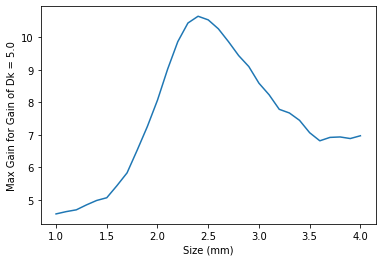

In [8]:
test = Dkset[5.0]
x = []
y = []
for j in range(len(test[0])):
    x.append(test[0][j])
    y.append((max(test[1][j])))

plt.plot(x,y)
plt.xlabel('Size (mm)')
plt.ylabel('Max Gain for Gain of Dk = 5.0')
plt.show()


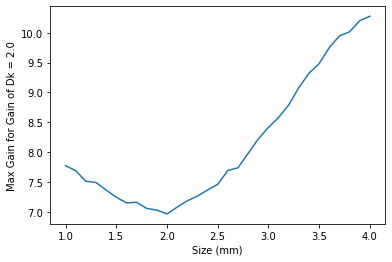

In [9]:
test = Dkset[2.0]
x = []
y = []
for j in range(len(test[0])):
    x.append(test[0][j])
    y.append((max(test[1][j])))

plt.plot(x,y)
plt.xlabel('Size (mm)')
plt.ylabel('Max Gain for Gain of Dk = 2.0')
plt.show()

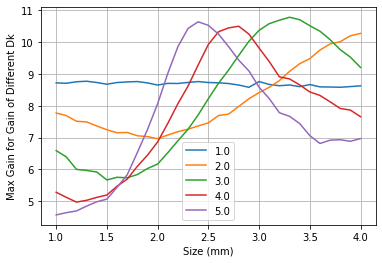

In [11]:
for m in range(5):
    test = Dkset[float(1.0 + m)]
    x = []
    y = []
    for j in range(len(test[0])):
        x.append(test[0][j])
        y.append(max(test[1][j]))

    plt.plot(x, y, label = str(float(1.0 + m )))

plt.xlabel("Size (mm)")
plt.ylabel('Max Gain for Gain of Different Dk')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
def findMainWidth(sequence):
    index = list(range(len(sequence)))
    ref = max(sequence)
    m = sequence.index(ref)
    l = m
    while sequence[l] > ref - 3:
        l -= 1
    L = intersectx(l, sequence[l], l+1, sequence[l+1], ref - 3)
    h = m
    while sequence[h] > ref - 3:
        h += 1
    H = intersectx(h, sequence[h], h-1, sequence[h-1], ref - 3)

    return H - L

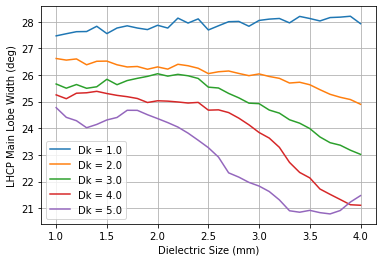

In [17]:
out = []
x = list(float(1.0+0.1*i) for i in range(31))
for i in range(5):
    W = []
    for j in range(len(Dkset[float(1.0 + i)][0])):
          w = findMainWidth(Dkset[float(1.0 + i)][1][j])
          W.append(w)

    out.append(W)
    plt.plot(x, W, label = 'Dk = ' + str(float(1.0 + i)))
plt.legend()
plt.xlabel('Dielectric Size (mm)')
plt.ylabel('LHCP Main Lobe Width (deg)')
plt.grid(True)
plt.show()